#  <center> </center>
# <center>Trabajo Practico 1 </center>
### <center>Grupo 10 </center>
## Integrantes:
#### Alan Richmond
#### Flavian Ferré
#### Alan Mejia

# 0. Inicializacion de los datos

## Importando Librerias


In [4]:
#Manipulacion de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor

# 4. Clasificacion

## Importado del dataset

In [5]:
conjunto_entrenamiento_final = pd.read_csv("Datasets/conjunto_entrenamiento_final.csv")
conjunto_entrenamiento_final

,latitud,longitud,place_l3,property_type,property_bedrooms,property_rooms,property_surface_covered,property_surface_total,property_price,price_per_square_meter
0,-34.637319,-58.361124,Boca,Departamento,2.0,3.0,55.0,58.0,82900.0,1429.310345
1,-34.628647,-58.361871,Boca,Departamento,3.0,4.0,70.0,70.0,99000.0,1414.285714
2,-34.610027,-58.401934,Balvanera,Departamento,2.0,4.0,104.0,138.0,146000.0,1057.971014
3,-34.631621,-58.416825,Boedo,PH,2.0,4.0,73.0,118.0,250000.0,2118.644068
4,-34.623886,-58.412746,Boedo,PH,1.0,2.0,46.0,61.0,100000.0,1639.344262
...,...,...,...,...,...,...,...,...,...,...
65445,-34.582800,-58.442800,Palermo,Departamento,1.0,1.0,32.0,36.0,98514.0,2736.500000
65446,-34.590332,-58.420135,Palermo,Departamento,3.0,4.0,72.0,81.0,200000.0,2469.135802
65447,-34.576232,-58.441949,Palermo,Departamento,2.0,3.0,57.0,62.0,130000.0,2096.774194
65448,-34.582800,-58.442800,Palermo,Departamento,1.0,1.0,32.0,36.0,100273.0,2785.361111


In [6]:
conjunto_prueba_final = pd.read_csv("Datasets/conjunto_prueba_reducido.csv")
conjunto_prueba_final

,latitud,longitud,zone,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
0,-34.594832,-58.419821,Palermo,Departamento,1.0,1.0,26.0,26.0,64765.0,MONOAMBIENTE EMPRENDIMIENTO PALERMO SOHO
1,-34.585604,-58.423957,Palermo,Departamento,1.0,1.0,32.0,30.0,110000.0,Venta departamento en palermo monoambiente
2,-34.582800,-58.442800,Palermo,Departamento,1.0,1.0,36.0,32.0,93621.0,VENTA 1 AMBIENTE de 32 a 66 m² -VIVIENDA/ ESTU...
3,-34.577400,-58.433300,Palermo,Departamento,2.0,1.0,42.0,38.0,79900.0,VENTA DEPARTAMENTO 2 AMBIENTES EN PALERMO
4,-34.575328,-58.420624,Palermo,Departamento,2.0,1.0,47.0,41.0,155000.0,DEPARTAMENTO DUPLEX 2 AMBIENTES CON 2 BALCONES...
...,...,...,...,...,...,...,...,...,...,...
18338,-34.603245,-58.489810,Villa del Parque,Departamento,4.0,3.0,130.0,100.0,220000.0,Espectacular 4 amb130m2 con Balcon Terraza!!!
18339,-34.614063,-58.482814,Villa del Parque,Departamento,3.0,2.0,68.0,60.0,161000.0,3 ambientes con cochera listo para habitar!
18340,-34.614175,-58.479062,Villa del Parque,Departamento,1.0,1.0,51.0,30.0,75500.0,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
18341,-34.614175,-58.479062,Villa del Parque,Departamento,1.0,1.0,37.0,31.0,74500.0,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


## a. Modelo 1 : KNN

### Preparacion del dataset de entrenamiento

Aplicaremos las mismas transformaciones que para la parte 3

In [7]:
df_transformado = pd.get_dummies(conjunto_entrenamiento_final, columns=['property_type'], drop_first=False, dtype=int)

df_transformado['title_len'] = df_transformado['place_l3'].str.len()
df_transformado['title_words'] = df_transformado['place_l3'].str.split().str.len()
df_transformado.drop(['place_l3', 'price_per_square_meter'], axis=1, inplace=True)

columnas_num = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered','title_len','title_words']
standard_scaler = StandardScaler()
df_transformado[columnas_num] = standard_scaler.fit_transform(df_transformado[columnas_num])

df_transformado.dropna(inplace=True)

df_transformado

,latitud,longitud,property_bedrooms,property_rooms,property_surface_covered,property_surface_total,property_price,property_type_Casa,property_type_Departamento,property_type_PH,title_len,title_words
0,-34.637319,-58.361124,0.442879,0.495165,-0.158304,-0.331940,82900.0,0,1,0,-1.767848,-0.637623
1,-34.628647,-58.361871,1.777922,1.501736,0.386117,0.018067,99000.0,0,1,0,-1.767848,-0.637623
2,-34.610027,-58.401934,0.442879,1.501736,1.620138,2.001439,146000.0,0,1,0,-0.143673,-0.637623
3,-34.631621,-58.416825,0.442879,1.501736,0.495001,1.418094,250000.0,0,0,1,-1.443013,-0.637623
4,-34.623886,-58.412746,-0.892164,-0.511406,-0.484956,-0.244438,100000.0,0,0,1,-1.443013,-0.637623
...,...,...,...,...,...,...,...,...,...,...,...,...
65445,-34.582800,-58.442800,-0.892164,-1.517977,-0.993083,-0.973619,98514.0,0,1,0,-0.793343,-0.637623
65446,-34.590332,-58.420135,1.777922,1.501736,0.458707,0.338906,200000.0,0,1,0,-0.793343,-0.637623
65447,-34.576232,-58.441949,0.442879,0.495165,-0.085714,-0.215271,130000.0,0,1,0,-0.793343,-0.637623
65448,-34.582800,-58.442800,-0.892164,-1.517977,-0.993083,-0.973619,100273.0,0,1,0,-0.793343,-0.637623


Dividimos el conjunto en dos : x_train / y_train

In [8]:
x_train = df_transformado.drop(columns=["property_price"])
y_train = df_transformado["property_price"]

### Optimizacion de los hiperparametros

Vamos a hacer un Random Search con 5 folds y 10 iteraciones, porque como el conjunto de datos es bastante grande, es preferible no tener demasiado tiempo de calculo.

In [9]:
#Grilla de Parámetros
params_grid={'n_neighbors':range(1,30), 
             'weights':['distance', 'uniform'],
             'algorithm':['ball_tree', 'kd_tree', 'brute'],
             'metric':['euclidean', 'manhattan', 'chebyshev', 'haversine', 'minkowski']
            }

#Clasificador KNN
knn_regressor=KNeighborsRegressor()

#Utilizaremos el R2 Score porque es más fácil de interpretar en el caso de las regresiones
scoring = make_scorer(r2_score)

#Random Search con 5 Folds y 10 iteraciones
random_search = RandomizedSearchCV(knn_regressor, params_grid, cv=10, scoring=scoring, n_iter=10, random_state=5)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print("Mejores parámetros: ", best_params)
print("Mejor score: ", best_score)

Mejores parámetros:  {'weights': 'distance', 'n_neighbors': 19, 'metric': 'manhattan', 'algorithm': 'brute'}
Mejor score:  0.8237097835960203


c:\Users\flaph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\flaph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\flaph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_regression.py", line 217, in fit
    return self._fit(X, y)
  File "c:\Users\flaph\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\

In [10]:
knn_modelo=KNeighborsRegressor().set_params(**best_params)

#Entreno el arbol en todo el set
knn_modelo.fit(x_train,y_train)

KNeighborsRegressor(algorithm='brute', metric='manhattan', n_neighbors=19,
                    weights='distance')

Le modela esta entrenado correctamente y podemos probarlo con el conjunto "test"

### Evaluacion del modelo

Aplicaremos las mismas transformaciones que para el conjunto de entrenamiento

In [11]:
df_prueba_transformado = pd.get_dummies(conjunto_prueba_final, columns=['property_type'], drop_first=False, dtype=int)

df_prueba_transformado['title_len'] = df_prueba_transformado['zone'].str.len()
df_prueba_transformado['title_words'] = df_prueba_transformado['zone'].str.split().str.len()
df_prueba_transformado.drop(['zone'], axis=1, inplace=True)

columnas_num = ['property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered','title_len','title_words']
standard_scaler = StandardScaler()
df_prueba_transformado[columnas_num] = standard_scaler.fit_transform(df_prueba_transformado[columnas_num])

df_prueba_transformado.drop(columns=["property_title"], inplace=True)
df_prueba_transformado.dropna(inplace=True)

column_order = df_transformado.columns
df_prueba_transformado = df_prueba_transformado[column_order]

df_prueba_transformado

,latitud,longitud,property_bedrooms,property_rooms,property_surface_covered,property_surface_total,property_price,property_type_Casa,property_type_Departamento,property_type_PH,title_len,title_words
0,-34.594832,-58.419821,-0.783908,-1.136818,-0.055521,-0.069300,64765.0,0,1,0,-0.801643,-0.673381
1,-34.585604,-58.423957,-0.783908,-1.136818,-0.052126,-0.064261,110000.0,0,1,0,-0.801643,-0.673381
2,-34.582800,-58.442800,-0.783908,-1.136818,-0.050429,-0.060901,93621.0,0,1,0,-0.801643,-0.673381
3,-34.577400,-58.433300,-0.783908,-0.514722,-0.045337,-0.055861,79900.0,0,1,0,-0.801643,-0.673381
4,-34.575328,-58.420624,-0.783908,-0.514722,-0.042791,-0.051662,155000.0,0,1,0,-0.801643,-0.673381
...,...,...,...,...,...,...,...,...,...,...,...,...
18338,-34.603245,-58.489810,0.981281,0.729469,0.007281,0.018052,220000.0,0,1,0,2.062505,2.954177
18339,-34.614063,-58.482814,0.098686,0.107374,-0.026666,-0.034023,161000.0,0,1,0,2.062505,2.954177
18340,-34.614175,-58.479062,-0.783908,-1.136818,-0.052126,-0.048302,75500.0,0,1,0,2.062505,2.954177
18341,-34.614175,-58.479062,-0.783908,-1.136818,-0.051277,-0.060061,74500.0,0,1,0,2.062505,2.954177


In [12]:
x_prueba = df_prueba_transformado.drop(columns=["property_price"])
y_prueba = df_prueba_transformado["property_price"]

R2 Score: 0.00866352413436311
MSE: 80899641762.71526


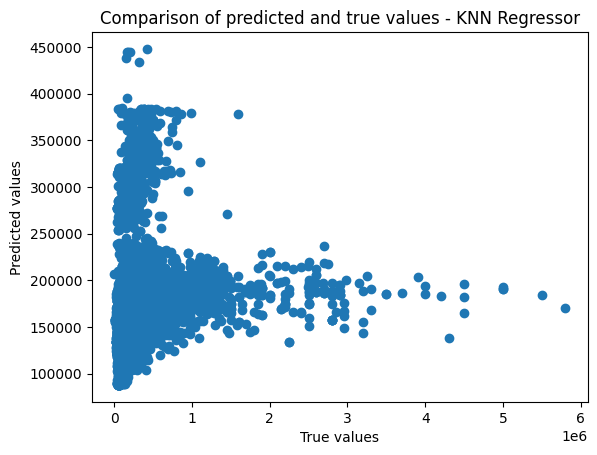

In [13]:
#predicción sobre el set de evaluacion
y_pred = knn_modelo.predict(x_prueba)

#Métricas
print('R2 Score: {}'.format(r2_score(y_prueba, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_prueba, y_pred)))

plt.scatter(y_prueba, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Comparison of predicted and true values - KNN Regressor")
plt.show()

## b. Modelo 2 : XGBoost

### Optimizacion de los hiperparametros

In [14]:
#Grilla de Parámetros
params_grid={'n_estimators':range(1,30), 
             'max_depth':range(1,10),
             'learning_rate':np.linspace(0,1,21),
             'gamma':np.linspace(0,1,21)
            }

#Clasificador KNN
xgb_regressor = XGBRegressor()

#Utilizaremos el R2 Score porque es más fácil de interpretar en el caso de las regresiones
scoring = make_scorer(r2_score)

#Random Search con 5 Folds y 10 iteraciones
random_search = RandomizedSearchCV(xgb_regressor, params_grid, cv=10, scoring=scoring, n_iter=10, random_state=5)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print("Mejores parámetros: ", best_params)
print("Mejor score: ", best_score)

Mejores parámetros:  {'n_estimators': 14, 'max_depth': 7, 'learning_rate': 0.5, 'gamma': 0.30000000000000004}
Mejor score:  0.8209762485838572


In [15]:
xgb_regressor=XGBRegressor().set_params(**best_params)

#Entreno el arbol en todo el set
xgb_regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.30000000000000004, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=14, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluacion del modelo

R2 Score: 0.06550399903638493


MSE: 76261081426.09407


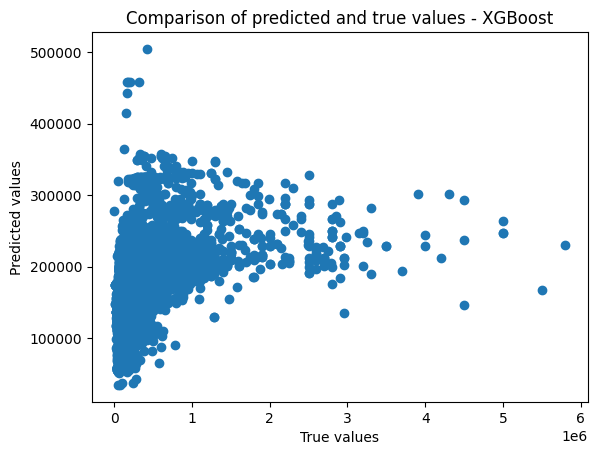

In [16]:
#predicción sobre el set de evaluacion
y_pred = xgb_regressor.predict(x_prueba)

#Métricas
print('R2 Score: {}'.format(r2_score(y_prueba, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_prueba, y_pred)))

plt.scatter(y_prueba, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Comparison of predicted and true values - XGBoost")
plt.show()

## c. Modelo 3 : Ridge Regression

### Optimizacion de los hiperparametros

In [17]:
#Grilla de Parámetros
params_grid={'alpha':np.linspace(0,10,101)}

#Clasificador KNN
ridge = Ridge()

#Utilizaremos el R2 Score porque es más fácil de interpretar en el caso de las regresiones
scoring = make_scorer(r2_score)

#Random Search con 5 Folds y 10 iteraciones
random_search = RandomizedSearchCV(ridge, params_grid, cv=10, scoring=scoring, n_iter=10, random_state=5)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_score = random_search.best_score_
print("Mejores parámetros: ", best_params)
print("Mejor score: ", best_score)

Mejores parámetros:  {'alpha': 1.0}
Mejor score:  0.671287176218992


In [18]:
ridge=Ridge().set_params(**best_params)

#Entreno el arbol en todo el set
ridge.fit(x_train,y_train)

Ridge()

### Evaluacion del modelo

R2 Score: -0.3783740991564486
MSE: 112484482868.8376


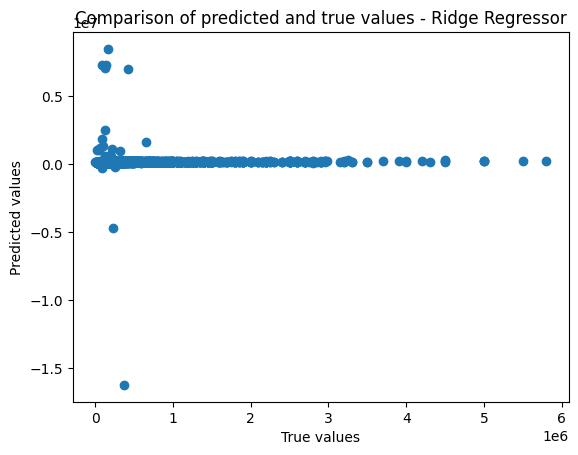

In [19]:
#predicción sobre el set de evaluacion
y_pred = ridge.predict(x_prueba)

#Métricas
print('R2 Score: {}'.format(r2_score(y_prueba, y_pred)))
print('MSE: {}'.format(mean_squared_error(y_prueba, y_pred)))

plt.scatter(y_prueba, y_pred)
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Comparison of predicted and true values - Ridge Regressor")
plt.show()

# ¿Qué modelo elegirían para predecir el precio de venta de las propiedades?
Para predecir, nosotros nos parece mejor el XGBoost.